# Week 4 Day 2, Lab B: Memoization

In [ ]:
# Always run this code.
%config InteractiveShell.ast_node_interactivity="none"
import sys
if 'google.colab' in sys.modules:
    !pip install --force-reinstall git+https://github.com/jamcoders/jamcoders-public-2023.git --quiet
from jamcoders.base_utils import *
from jamcoders.week4.labw4d2b import *

## 1 Fibonacci

Let's start with Fibonacci numbers. Recall that the Fibonacci sequence is defined recursively, with
 * $f_0 = 0$
 * $f_1 = 1$
 * For all $n \geq 2$: $f_n = f_{n-1} + f_{n-2}$.

Below is an implementation:

In [1]:
def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1

    return fib(n - 1) + fib(n - 2)

Run the following cell to try out our `fib` function:

In [6]:
for i in range(6):
  print(f"fib({i})={fib(i)}")

fib(0)=0
fib(1)=1
fib(2)=1
fib(3)=2
fib(4)=3
fib(5)=5


So, our code works!



### Question  1.1:

What are the first 10 Fibbonacci numbers? Write them down below. (You can use `fib()` to calculate them if you like.)

In [ ]:
fib0 = # Your answer here
fib1 = # Your answer here
fib2 = # Your answer here
fib3 = # Your answer here
fib4 = # Your answer here
fib5 = # Your answer here
fib6 = # Your answer here
fib7 = # Your answer here
fib8 = # Your answer here
fib9 = # Your answer here
fib10 = # Your answer here

check_answer_1_1([fib0, fib1, fib2, fib3, fib4, fib5, fib6, fib7, fib8, fib9, fib10])

However, our code for `fib()` is very slow. Run the following cell to see how long it takes it to run to compute the 30th Fibonacci number:

In [ ]:
%timeit fib(30)

1.47 s ± 464 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


So, running `fib(30)` takes more than 1 second, which is a lot! If we tried running `fib(500)`, it would take a VERY long time :(

## 1.1 **Optional**: the Time Complexity of `fib()`?

(You may skip to Section 1.2 if you want)

What is the time complexity of `fib(n)`? Let's observe two things.

1. First, whenever we call `fib`, we are either returning the result of two subcalls, or returning a base case. The only "numbers" that appear in `fib`'s definition are `0` and `1` in the base cases. So the only time we "add one" to the result we compute for `fib(n)` is when we arrive at some call to `fib(1)` in some chain of recursive subcalls. So the running time of `fib(n)` is **at least** the number of subcalls to `fib(1)`, which is equal to the number returned by `fib(n)`, which is $f_n$.
2. But $f_n$ grows exponentially large! We can observe this by comparing the ratios between successive Fibonacci numbers:


In [ ]:
print(fib(11) / fib(10))
print(fib(21) / fib(20))
print(fib(31) / fib(30))

1.6181818181818182
1.6180339985218033
1.6180339887505408


We see that $f_{n+1} \approx f_{n} \times 1.618$. Combined with observation 1, this implies that `fib(n)` itself takes exponential running time! That is, the runtime is $O(b^n)$ for some number $b$.

## 1.2 A Faster Fibbonacci

As we saw, our previous code for `fib` is very slow. How can we speed this up?

The code is slow because `fib(1)` is being called many many times. Why? Because `fib(2)` and `fib(3)` are themselves being called many many times. And those are being called by `fib(3)`, `fib(4)`, and `fib(5)` many many times. And so on.

For example, look what happens when we run `fib(5)`:

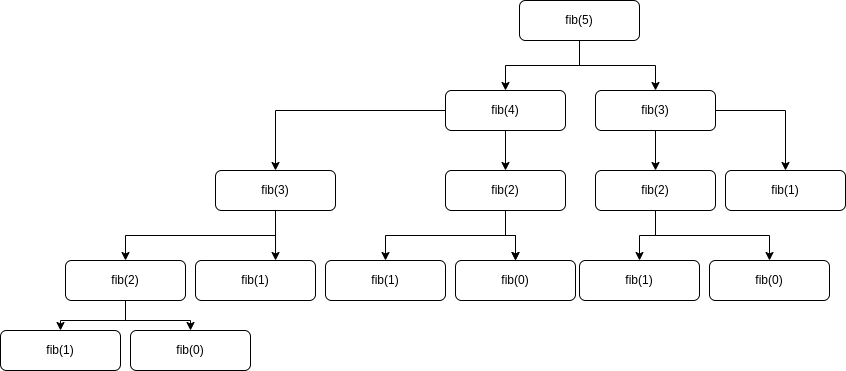

<sup><sub>Image source: [freecodecamp.org](https://www.freecodecamp.org/news/memoization-in-javascript-and-react/)</sub></sup>

How many times is `fib(1)` called when we run `fib(5)`?

In [ ]:
number_of_times_fib1_is_called = # Your answer here

check_answer_1_2(number_of_times_fib1_is_called)


What if we "remembered" the result of calls to all `fib(i)` so they are only computed once? We'd be a lot faster! This technique is known as *memoization*.

Read the code below:

In [ ]:
def fib_memo(n, mem):
    if mem[n] is not None:
        return mem[n]

    mem[n] = fib_memo(n - 1, mem) + fib_memo(n - 2, mem)
    return mem[n]


def fib_fast(n):
    mem = [None] * (n + 1)
    # Instead of defining base cases in fib_memo,
    # we can instead populate the cache for 0 and 1.
    mem[0] = 0
    mem[1] = 1
    return fib_memo(n, mem)

How fast is the memoized version `fib_fast(30)`? Instant! (A µs, pronounced "microsecond", is 1/1,000,000'th of a second).

In [ ]:
print(fib_fast(30))

%timeit fib_fast(30)

We can also compute $f_{500}$ nearly instantly. This would have taken $1 \text{ second} \times (1.618)^{(500 - 30)} = 5.258 \times 10^{90} \text{ years}$ with `fib`. That's about $3.8 \times 10^{80}$ times longer than the universe has been alive!

In [ ]:
print(fib_fast(500))

%timeit fib_fast(500)

What is the time complexity of `fib_fast`? Because we only call `fib_memo(i)` on every $0 \leq i \leq n$ once, we make linearly many calls to `fib_memo` (instead of exponentially many calls to `fib`). Assuming constant-time addition, `fib_fast` thus takes $\mathcal{O}(n)$ time. Yay!



## 2 Paths on a Grid

Consider a $4 \times 4$ grid. We want to go from the bottom left corner to the upper right corner using only steps that go upward or rightward. Here are a few of the possible paths we could take:  

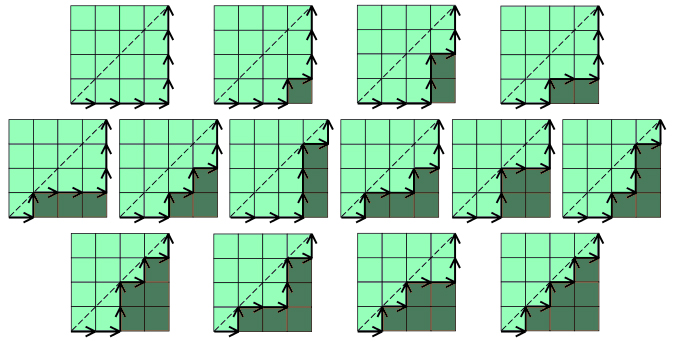

<sup><sub>Image source: [geeksforgeeks.org](https://www.geeksforgeeks.org/applications-of-catalan-numbers/)</sub></sup>

### Question 2.1

Write a recursive function `count_grid_paths(n,m)` that counts the number of paths in a grid with `n` rows and `m` columns that start at the bottom left corner, end in the upper right corner, and use only steps that go 1 edge to the right or 1 edge up.

In [ ]:
def count_grid_paths(n, m):
  # Base case:
  if n == 1 or m == 1:
    # Your code here.

  # Recursive case:
  else:
    # Your code here.

### Question 2.2

Try to compute the number of paths in a $50 \times 100$ grid. How long did this take? Did the code finish running? Explain why this happens.

In [ ]:
# Your answer here.

### Question 2.3

Use memoization to write a new function `count_grid_paths_fast(n,m)` that does the same thing that `count_grid_paths(n,m)` does, but runs much faster.

In [ ]:
def count_grid_paths_fast_helper(n, m, memory):
  if memory[n][m] == None:
     # Your code here.
     # Hint: You might want to reuse some ideas from your code for count_grid_paths().

     memory[n][m] = # Your code here

  return memory[n][m]



def count_grid_paths_fast(n, m):
  memory = []
  for i in range(n+1):
    memory.append([None] * (m+1))

  return count_grid_paths_fast_helper(n, m, memory)

### Question 2.4

Now, try to compute the number of paths in a $50 \times 100$ grid using the memoized function `count_grid_paths_fast()`. What is the result?

In [ ]:
num_of_paths_for_50_by_100_grid = # Your answer here.

How long did this take to compute this? Did the code finish running? Explain why this happens.

In [ ]:
# Your answer here.

## 3 Coin Change

In the lecture we saw the *coin change* problem: given a set of coin denominations and a target coin value, find the smallest number of coins that add up to that value. For example, what is the smallest set of coins you need to get J\$75, using the Jamacian coins J\$1, J\$5, J\$10, J\$20? (5 coins: J\$20 + J\$20 + J\$20 + J\$10 + J\$5).

We want to create an algorithm that, given any set of coin denominations and a target value, finds the smallest set of coins for us.

### 3.1 Pot of Greed

The first idea that might come to mind is to be *greedy*. That is, keep choosing the largest coin that doesn't make your total larger than the target value. This works for some sets of coin denominations. For example, a greedy algorithm always will find the smallest combination of coins when you use the Jamacian coins (J\$1, J\$5, J\$10, J\$20).

Using the *greedy* algorithm, what Jamaican coins would you choose that add up to J\$34?

In [ ]:
# What Jamaican coins would the greedy algorithm use to add up to J$34?
# Write your answer in the array below as integers.
# For example, [20, 20, 20, 10, 5] would represent J$20 + J$20 + J$20 + J$10 + J$5.

coins =    # YOUR ANSWER HERE

check_answer_3_1a(sorted(coins))

Using the greedy algorithm, what US coins would you choose that add up to 30¢? Recall that the US coin denominations are 1¢, 5¢, 10¢, and 25¢.

In [ ]:
# What US coins would would the greedy algorithm use to add up to 30¢?
# The US coins are 1¢, 5¢, 10¢, and 25¢.
# Write your answer in the array below as integers.
# For example, [25, 25, 25] would represent 25¢ + 25¢ + 25¢.

coins =    # YOUR ANSWER HERE

check_answer_3_1b(sorted(coins))

What if we weren't allowed to use the 5¢ coin? What coins would the greedy algorithm choose?


In [ ]:
# What US coins would the greedy algorithm use to add up to 30¢, without the 5¢ coin?
# Use the coins 1¢, 10¢, and 25¢.

coins =    # YOUR ANSWER HERE

check_answer_3_1c(sorted(coins))

Is this the least number of coins? Can you do better?

In [ ]:
# What US coins would *you* use to make 30¢?
# Use the coins 1¢, 10¢, and 25¢.

coins =    # YOUR ANSWER HERE

check_answer_3_1d(sorted(coins))

Why doesn't greedy work? Think, then run the code below for our answer.

In [ ]:
import base64
exec(base64.b64decode("aW1wb3J0IHRleHR3cmFwCgp0ZXh0ID0gJ0dyZWVkeSBhbGdvcml0aG1zIGFsd2F5cyB0YWtlIHRoZSAiYmVzdCIgY3VycmVudCBvcHRpb24uIEJ1dCBzb21ldGltZXMgaXRcJ3MgZ29vZCB0byBsb29rIGFoZWFkOiB0aGUgc2hvcnQgdGVybSBiZXN0IG9wdGlvbiBpcyBub3QgYWx3YXlzIHRoZSBsb25nIHRlcm0gYmVzdCBvcHRpb24uIEEgc21hbGwgc2FjcmlmaWNlIG5vdyAodGFraW5nIHRoZSAxMMKiIGluc3RlYWQgb2YgdGhlIDI1wqIpIGNhbiB0cmFuc2xhdGUgaW50byBhIGJpZyB3aW4gaW4gdGhlIGZ1dHVyZS4nCnByaW50KCdcbicuam9pbih0ZXh0d3JhcC53cmFwKHRleHQsIDgwKSkp"))

### 3.2 Greed isn't always good

If greedy doesn't work, how can we proceed? We can always use *brute force.*

For the first coin, we know we must choose one of the coins in our set. Why not try all of them?

Let's try the above problem again: we want to make 30¢ out of 1¢, 10¢, and 25¢ coins. We can try each one:

$$
\texttt{coin_change(30)} \\
\begin{align*}
30¢& - 1¢  &=\;&29¢  \\
30¢& - 10¢ &=\;&20¢  \\
30¢& - 25¢ &=\;&5¢  \\
\end{align*}
$$

Notice that after choosing one coin, we now have a coin change problem for a smaller value. How do we find coins that add up to that value? We can recursively call ourselves, of course, and take the minimum. For example, here are the recursive calls for `coin_change(30)`:

$$
\texttt{coin_change(30)} \\
\begin{align*}
30¢& - 1¢  &=\;&29¢ &\rightarrow \texttt{coin_change(29)}  \\
30¢& - 10¢ &=\;&20¢ &\rightarrow \texttt{coin_change(20)}  \\
30¢& - 25¢ &=\;&5¢  &\rightarrow \texttt{coin_change(5)  }  \\
\end{align*}
$$

Fill in the skeleton for `coin_change` below.

In [ ]:
def coin_change(target, coins):
    """Finds a list of coins with smallest size that adds up to target.

    Arguments:
        target: The value to reach.
        coins: The allowed (positive) denominations of coins.

    Returns (list or None):
        The smallest list of coins that add up to `target`.
        If there is no possible way to add to `target`, returns None.
    """
    # Base cases.
    if ________________:                  # YOUR CODE HERE
        return ________________           # YOUR CODE HERE

    if ________________:                  # YOUR CODE HERE
        return ________________

    # Recursive case.
    best = None
    for coin in coins:
        result = ______________________   # YOUR CODE HERE
        if result is None:
            continue

        if best == None or ___________ < ___________:   # YOUR CODE HERE
            best = [coin] + result

    return best


assert_equal(want=[10, 10, 10], got=sorted(coin_change(30, [1, 10, 25])))
assert_equal(want=[1, 1, 1, 5], got=sorted(coin_change(8, [1, 5, 10, 20])))
assert_equal(want=[1, 1, 5, 10], got=sorted(coin_change(17, [20, 10, 5, 1])))
assert_equal(want=[4, 4], got=sorted(coin_change(8, [20, 10, 5, 4, 1])))
assert_equal(want=[4, 5], got=sorted(coin_change(9, [1, 4, 5, 10, 20])))
assert_equal(want=[], got=sorted(coin_change(0, [20, 10, 5, 1])))


### 3.3 Runtime of `coin_change`

Try running your `coin_change` operation on larger values of `target`. How long does it take?

If your code runs for too long because `target` was too big, you can press the stop button in Jupyter (⏹).

In [ ]:
# Try running coin_change below.

for i in (10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
    print(i, end="\t")
    repeats = 7 if i < 50 else 1
    get_ipython().run_line_magic('timeit', f'-r {repeats} coin_change(i, [1, 5, 10, 20])')


Why is `coin_change` taking so long? The call to `coin_change(50)` creates four new recursive calls to `coin_change(49)`, `coin_change(45)`, `coin_change(40)`, and `coin_change(30)`. Each one of those creates four new recursive calls as well, and so on. The total amount of work done is *exponential*; $\mathcal{O}(b^n)$ (where $b$ is some base that depends on the coins that are passed in).

Exponential growth is extremely fast. Here are the running times for `coin_change` from my laptop:


| target | time                | multiplier from previous |
|--------|---------------------|--------------------------|
| 10     | 0.0000171s          |                          |
| 20     | 0.000379s           | x22.1                    |
| 30     | 0.00816s            | x21.6                    |
| 40     | 0.176s              | x21.5                    |
| 50     | 3.78s               | x21.5                    |
| 60     | 81.6s               | x21.6                    |
| 70     | 29m 50s             | x21.9                    |
| 80     | 10h 53m  (estimate) | x21.9                    |
| 90     | 9d 22h (estimate)   | x21.9                    |
| 100    | 217d 12h (estimate) | x21.9                    |

But clearly we can do better. It doesn't take a cashier 9 days to give you J\\$90 in coins!

How can we make `coin_change` run faster? Below is `coin_change_count`, which counts how many times `coin_change` calls itself on a particular target value:

In [ ]:

# Don't worry about understanding this code.

def coin_change_count(target, coins, count_target):
    # Replace the global coin_change with our own function...
    global coin_change
    # Save the real coin change function so we can restore it later.
    real_coin_change = coin_change
    counter = 0
    def counting_coin_change(t, c):
        # Need nonlocal to write to the counter in the parent scope.
        nonlocal counter
        if t == count_target:
            counter += 1
        return real_coin_change(t, c)
    coin_change = counting_coin_change

    # Call our counting_coin_change function.
    coin_change(target, coins)

    # Restore the real coin change function.
    coin_change = real_coin_change

    return counter


# How many times do we recursively call coin_change(10) in for each of
# coin_change(10), coin_change(20), ..., coin_change(60)?
assert_equal(want=1, got=coin_change_count(10, [1, 5, 10, 20], count_target=10))
assert_equal(want=9, got=coin_change_count(20, [1, 5, 10, 20], count_target=10))
assert_equal(want=198, got=coin_change_count(30, [1, 5, 10, 20], count_target=10))
assert_equal(want=4287, got=coin_change_count(40, [1, 5, 10, 20], count_target=10))
assert_equal(want=92249, got=coin_change_count(50, [1, 5, 10, 20], count_target=10))
assert_equal(want=1984369, got=coin_change_count(60, [1, 5, 10, 20], count_target=10))


We're repeating the call to `coin_change(10)` many thousands of times. Why? `coin_change(10)` is called by `coin_change(11)`, `coin_change(15)`, `coin_change(20)`, and `coin_change(30)`, which are themselves called many times. But we know that each time they are called, they return the same thing. What if we remembered the result for each call, and returned it instead of recomputing the result?

### 3.4 Coin Change, Fast

Write `coin_change_fast` and `coin_change_memo`. For the body of `coin_change_memo`, copy the body of `coin_change` above, except surround the body with logic that checks the `mem` cache for whether we have seen that recursive call before. Also, add results to the cache after it is computed for the first time.

`coin_change_fast` should create a `mem` array and pass that to `coin_change_memo`.

In [ ]:
def coin_change_memo(n, coins, memo):
    # Check memo for cached value.
    if _________________:                    # YOUR CODE HERE
        return _________________             # YOUR CODE HERE

    # REPLACE WITH coin_change BODY

    # Add the result to the memo cache
    _____________________                    # YOUR CODE HERE

def coin_change_fast(n, coins):
    # How large does the cache need to be?
    memo = _________________                 # YOUR CODE HERE

    return  ____________________             # YOUR CODE HERE



assert_equal(want=[10, 10, 10], got=sorted(coin_change_fast(30, [1, 10, 25]), reverse=True))
assert_equal(want=[5, 1, 1, 1], got=sorted(coin_change_fast(8, [1, 5, 10, 20]), reverse=True))
assert_equal(want=[10, 5, 1, 1], got=sorted(coin_change_fast(17, [20, 10, 5, 1]), reverse=True))
assert_equal(want=[4, 4], got=sorted(coin_change_fast(8, [20, 10, 5, 4, 1]), reverse=True))
assert_equal(want=[5, 4], got=sorted(coin_change_fast(9, [1, 4, 5, 10, 20]), reverse=True))
assert_equal(want=[], got=sorted(coin_change_fast(0, [20, 10, 5, 1]), reverse=True))
assert_equal(want=[20, 20, 20, 20, 10, 5, 1, 1, 1, 1], got=sorted(coin_change_fast(99, [20, 10, 5, 1]), reverse=True))
assert_equal(want=[25, 25, 25, 10, 10, 1, 1, 1, 1], got=sorted(coin_change_fast(99, [25, 10, 5, 1]), reverse=True))

## 4 **Challenge**

### Question 4.1 `fib_fast(n)` runtime

We said that computing `fib_fast(n)` requires at most linearly many in $n$ calls to `fib_fast(n)`. But what is its runtime?

*Hint: Adding two numbers $A + B$ takes $\mathcal{O}(\log{A} + \log{B})$ runtime. Also, $f_n \approx 1.618^{n}$.*

In [ ]:
# YOUR CODE/ANSWER HERE

### Question 4.2 `fib_fast(n)` space

`fib_fast(n)` currently stores every Fibonacci number $f_i : 0 \leq i \leq n$ in memory. How might you rewrite `fib_fast(n)` to use even less space?

*Hint: Think of each invocation of `fib_fast(i)` as a separate node in a graph, and draw an edge from `fib_fast(i)` to `fib_fast(j)` if `fib_fast(i)` recursively calls `fib_fast(j)`. In what order does `fib_fast` above "call" each node? When does the result of a call become unneeded? Can you call them in a different order to save space?*

In [ ]:
# YOUR CODE/ANSWER HERE

### Question 4.3

Notice that the number of paths in a grid of size $k \times \ell$ is the same as the number of paths in a grid of size $\ell \times k$. However, when we execute `count_grid_paths_fast(m, n)`, the functoin computes the number of paths for $k \times \ell$ ***and*** for $\ell \times k$ for many values of $k$ and $\ell$. This actually doubles the amount of work that the function does beyond what is necessary!

Rewrite the functions `count_grid_paths_fast` and `count_grid_paths_fast_helper` so that they run twice as fast as before, by removing redundant calculations.  

In [ ]:
# YOUR CODE HERE

### Question 4.4

Give a mathematical expression (using factorials and/or binomial coeffcients) for the number of paths computed by `count_grid_paths_fast(m,n)`.   

In [ ]:
# YOUR CODE HERE

### Question 4.5 Canonical Coin Making

A coin making system (i.e. the denominations of coins that are given) is called *canonical* if the greedy algorithm is also an optimal algorithm. (Our `coin_change` and `coin_change_fast` algorithms are optimal because they exhaustively search through all possibilities.)

Are the Jamaican and US coin systems canonical? Why or why not?

In [ ]:
# YOUR CODE/ANSWER HERE